# Introduction to Markov Decision Processes

## CSCI E-82A
### Stephen Elston

## 1.0 Introduction   

In this lesson we will introduce **Markov processes**, which are a **representation** of a **memoryless state transition processes**. The diagram below shows the Markov process representation in the intelligent agent, along with the interactions with the environment.   

<img src="img/AgentEnvironment.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **Interaction of agent and environment** </center>

**Markov decision processes** which are widely used in planning and optimal decision theory. The closely related **Markov reward process** is necessary for planning and optimal decision methods. We will introduce the Markov reward process here. Markov decision processes are addressed in another lesson. 

Suggested readings: The following reading is an optional supplement to the material presented here:

Sutton and Barto, second edition, Sections 3.1, 3.2, 3.3, 3.4, 3.5 or
Russell and Norvig, third edition, Section 7.1, or
Kochenderfer, Section 4.1.

## 2.0 Markov Processes

A first order **Markov process** is a process where the probability of a transition between a **finite set of states** only depends on the current state. In other words, first order **Markov processes have no memory of past states**. The current state has all the relevant information on the history of states.   

For the transition between as a state $S_t$, at time $t$ ,to the next state $S_{t+1}$, at time $t+1$, we can express a Markov process mathematically as follows:

$$p[S_{t+1}\ |\ S_1, \ldots, S_t] = p[S_{t+1}\ |\ S_t]$$

For a vector of possible states, $S$, we can create a **state transition probability matrix**. This matrix **represents** the probability of a state transition from $S$ to the next state, $S'$ at the next time step:

$$\mathcal{P_{ss'}} = 
\begin{bmatrix}
    P_{11} & \dots  & P_{1n} \\
    \vdots & \vdots  & \vdots \\
    P_{n1} & \dots  & P_{nn}
\end{bmatrix}\\
$$
Where, $\mathcal{P}_{ij} =$ probability of transition from state $s_i$ to $s_j$.   

Let's say we have a vector of probabilities of being in one of n possible states, $S = (s_1, s_2, \ldots, s_n)$. Using simple matrix multiplication we can write the relationships for the transition to the next state $S'$ as:

$$S' = \mathcal{P_{ss'}} S\\
or\\
\begin{bmatrix}
    s_1' \\
    \vdots \\
    s_n'
\end{bmatrix}
=
\begin{bmatrix}
    P_{11} & \dots  & P_{1n} \\
    \vdots & \vdots  & \vdots \\
    P_{n1} & \dots  & P_{nn}
\end{bmatrix}
\begin{bmatrix}
    s_1 \\
    \vdots \\
    s_n
\end{bmatrix}
\\
$$


A **Markov chain** is a sequence of of states of a Markov process. In other words, if we run a Markov process over a number of time steps the result is a Markov chain. 

If the transition probability matrix, $ \mathcal{P_{ss'}}$, does not change over time, we say the Markov chain is **stationary**. Stationary Markov chains have a **convergence property**. If we run the Markov chain for enough time steps, the chain will reach a **steady state**. At steady state the probabilities of being in any state of the Markov process is **unchanged from time step to time step**. 


### 2.1 Computational Example - When is it time to buy a new car?

Let's try a computational example to test out the foregoing concepts. In this case we will look at the state transitions for the use of an old car vs. a new car. The diagram below shows the states of car ownership and the possible transitions between them.   

<img src="img/CarStates.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **States and possible transitions of car uset** </center>

The states and the possible transitions are:
1. Old car, can transition to continue driving the old car, a breakdown, or an accident.
2. Old car breakdown, can transition to old car or new car.
3. Old car accident, transitions to new car.
4. New car, can transition to continue driving the new car, a breakdown, or an accident.
5. New car breakdown, transitions to new car or to an old car.
6. New car accident, transitions to new car.

Notice that there are no **terminal states** in this diagram. A terminal state can be entered, but there is no possible transition to another state. An example of a terminal state is the win or loss of game. The game is over, and there will be no more states for playing. Markov processes with terminal states are said to be **periodic** or **finite** since they run for a finite period, after which they must be restarted. Whereas, Markov processes with no terminal state are said to be **infinite**, since in theory they will run for an infinite number of time steps.

Given these transitions, the question is what is the probability that Steve will end up in a new car or keep his old car. 

We will start by defining a transition probability matrix and testing that the probabilities in the columns add to 1.0. 

In [10]:
import numpy as np
import numpy.random as nr
import pandas as pd
T = np.array([[9.8999e-01, 9.00000e-01, 0.00000e-00, 1.00000e-02, 0.00000e+00],
 [1.00000e-02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
 [0.0000,1.00000e-01, 9.98999e-01, 9.90000e-01, 1.00000e+00],
 [0.00000e+00, 0.00000e+00, 1.00000e-03, 0.00000e+00, 0.00000e+00],
 [0.00001e+00, 0.00000e+00, 1.00000e-06, 0.00000e+00, 0.00000e+00]])

print('The transition probability matrix')
labels = ['OldCar','OldBreak','NewCar','NewBreak','Acident']
print(pd.DataFrame(T, columns = labels, index = labels))

print('\nTest that the columns add to 1')
np.sum(T, axis = 0)

The transition probability matrix
           OldCar  OldBreak    NewCar  NewBreak  Acident
OldCar    0.98999       0.9  0.000000      0.01      0.0
OldBreak  0.01000       0.0  0.000000      0.00      0.0
NewCar    0.00000       0.1  0.998999      0.99      1.0
NewBreak  0.00000       0.0  0.001000      0.00      0.0
Acident   0.00001       0.0  0.000001      0.00      0.0

Test that the columns add to 1


array([1., 1., 1., 1., 1.])

Now we need to define an initial state for the Markov chain. In this case, Steve is driving his old car, so the state vector is defined as shown below. The multiplication by the transition probability matrix gives gives the new states. 

In [11]:
initial_state = np.array([1.0,0.0, 0.0, 0.0, 0.0 ])
pd.Series(np.matmul(T,initial_state), index = labels)

OldCar      0.98999
OldBreak    0.01000
NewCar      0.00000
NewBreak    0.00000
Acident     0.00001
dtype: float64

Notice how several states now have non-zero probabilities. Two states still have zero probabilities. 

### Exercise 1   

Let's see what happens when we apply a series of state transitions to this initial state. The code in the cell below performs these multiplications to compute the probabilities of the new state given the current state. The function returns a list containing the state vector following each transition. The final state vector is printed at the end. 

Complete this code, execute the code and print the result.

In [12]:
def state_transition(T, s, n = 1):
    s_list = np.reshape(s, (s.shape[0],1))
    for _ in range(n):
        s = np.matmul(T,s)
        ##### ADD CODE TO COMPUTE THE NEXT STATE PROBABILITY. #####
        s_list = np.concatenate((s_list, np.reshape(s, (s.shape[0],1))), axis = 1)
    return s_list
states = state_transition(T, initial_state, 10000)
pd.Series(states[:,999], index = labels)

OldCar      0.367014
OldBreak    0.003674
NewCar      0.628679
NewBreak    0.000628
Acident     0.000004
dtype: float64

Let's make a plot of two of these states. The state that the person uses the old car or the state that they buy a new car are plotted in the chart before. 

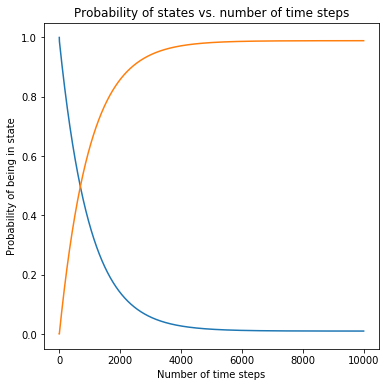

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_states(states, variables = [0,2]):
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis 
    ax.set_xlabel('Number of time steps')
    ax.set_ylabel('Probability of being in state')
    ax.set_title('Probability of states vs. number of time steps')
    for var in variables:
        plt.plot(states[var,:])
        
plot_states(states)        

### Exercise 2

Above, you can see the probabilities of being in each state after a large number of transitions. Now, create the code in the cell below to verify that the probabilities of the successor state at time step 999 (1000th step with 0 based indexing) add to 1.0. 

In [20]:
states[:,999].sum()

1.0000000000000113

Finally, plot the state probabilities for two other states, the probabilities of a breakdown for the old and new cars. 

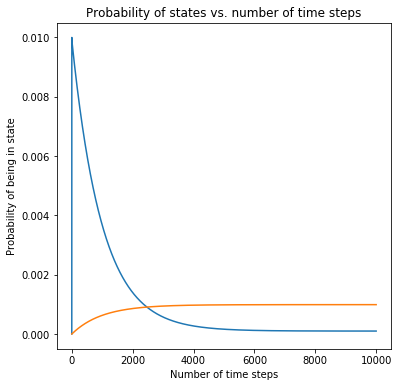

In [15]:
plot_states(states, [1,3]) 

As before these state probabilities are in steady state after about 4,000 steps. The probability of the old car breaking down approaches zero since there is a low probability of driving the old car in the steady state.  

## 3.0 Markov Reward Process

We can define a **reward function**, $\mathcal{R}$ as the expected reward in the next time step as:

$$\mathcal{R}_{s s'} = E \big[ R_{t+1}\ |\ S_t = s \big]$$   

Where, $R_{t+1}$ is the reward, or change in utility, for the time step, given a transition to a new state $s'$. 

Let's look at an example of a Markov reward process. The diagram below shows the rewards for the various state transitions in the auto example. Since owning cars has significant costs, all of the rewards are negative. 

<img src="img/CarRewards.JPG" alt="Drawing" style="width:500px; height:300px"/>
<center> **Rewards for state transitions of car use** </center>

Keep in mind that just like utility, **reward need not simply follow economic value**; e.g. money. For example, the reward of the car breaking down must account for the inconvenience of dealing with the repair, or the reward for driving the car must account for intangibles like comfort and safety of the passengers.  

What is the relationship between utility and reward in a Markov chain? It is easy to compute utility from rewards, since **rewards are additive**. First, let's consider a finite Markov reward process, which reaches a terminal state after $T$ time steps:

$$U([s_o, s_1, \ldots, s_T]) = R(s_o) + R(s_1) + \ldots + R(s_T) = \sum_{t = 0}^T R(s_t)$$

But, consider what happens with an infinite Markov reward process, which never reaches a terminal state. If we use the above formulation, the utility will grow without bound; e.g. $U(s_t) \rightarrow \infty$ as $T \rightarrow \infty$. 

The solution to keeping utility bounded for infinite Markov reward processes is **discounting**. By discounting we are saying that the value of a reward in the future decreases the further in the future the reward is received. This is a commonly used concept in many fields. For example, an investor will discount expected future returns, preferring immediate payoff. 

Using discounting, we can formulate a bounded relationship between utility and reward:

$$U([s_o, s_1, s_2, s_3 \ldots]) = R(s_o) + \gamma R(s_1) + \gamma^2 R(s_2) + \gamma^3 R(s_3) \ldots = \sum_{t = 0}^{\infty} \gamma^{t} R(s_t)$$

The choice of the discount parameter, $\gamma$, will change the outcome for the Markov reward process:
- As $\gamma \rightarrow 0$, the reward process becomes myopic, only counting near term rewards.
- As $\gamma \rightarrow 1$, the reward process becomes far sighted, valuing distant rewards highly. 

For infinite Markov reward processes we are interested in the **return** for state transitions starting with the current state. Return is the sum of the rewards for future state transitions and can be expressed as:

$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} \ldots = \sum_{k = 0}^{\infty} \gamma^{k} R_{t+k+1}$$

We are also interested in the **state value function**. This expression computes the expected future value of being in state $s$:

$$v(s) = E[G_t\ |\ S_t = s ]$$

## 4.0 Markov Decision Process and Optimal Policy

The agent uses a **policy**, $\pi$, to determine which action to take. The expected **action value** given the action, $a$, from state, $s$, by the policy is:   

$$q_{\pi}(s,a) = \mathbb{E}_{\pi} [G_{t}\ |\ S_t = s, A_t = a] $$

Our goal is to find an **optimal policy** which maximizes the expected action value. We say that the optimal policy, $q_*(s,a)$, gives the highest expected value for the action $a$:

$$q_{\pi^*}(s,a) = \mathbb{E}_{\pi^*} [G_{t}\ |\ S_t = s, A_t = a] $$

An optimal policy has an expected action value greater than or equal to all possible policies:

$$q_{\pi^*}(s,a) \ge q_{\pi}(s,a)\ \forall\ \pi$$

The bandit model is stateless. Thus, there is no state required for the representation.

### 4.1 Computational Example

With the above theory in mind, let's try a computational example for a Markov reward process. We are particularly interested in the convergence properties of the state value function. This convergence is key if we wish to find an optimal state for a Markov process. 

As a first step we, must define a matrix of the rewards for transitions between the states. Execute the code in the cell below and examine the result.

In [16]:
## Define the Markov reward matrix
R = np.array([[-30.0, -600, 0.0, -3000, 0.0],
 [-200.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, -30000, -20, -100, -30000],
 [0.0, 0.0, -1000, 0.0, 0.0],
 [-100000, 0.0, -50000, 0.0, 0.0]])

print('The reward matrix for state transitions')
labels = ['OldCar','OldBreak','NewCar','NewBreak','Acident']
print(pd.DataFrame(R, columns = labels, index = labels))

The reward matrix for state transitions
            OldCar  OldBreak   NewCar  NewBreak  Acident
OldCar       -30.0    -600.0      0.0   -3000.0      0.0
OldBreak    -200.0       0.0      0.0       0.0      0.0
NewCar         0.0  -30000.0    -20.0    -100.0 -30000.0
NewBreak       0.0       0.0  -1000.0       0.0      0.0
Acident  -100000.0       0.0 -50000.0       0.0      0.0


### Exercise 3   

The code in the cell below computes the value of being in some initial state $s$. The code comments explain the steps. Complete the code and execute the test case. 

In [21]:
def compute_state_value(T, R, s, n = 1, gamma = 0.9):
    v_list = [] # a list to hold the values
    for _ in range(n):
        s_prime = np.matmul(T,s) # The probabilities of being in the new states
        delta_s = np.subtract(s,s_prime) # The change in probabilities of the states
        s = s_prime
        v_list.append(np.sum(np.matmul(R,delta_s))) # Build the list of values
    
    state_value = 0.0
    ## Now loop over the state transitions and compute the discounted value
    for k in range(n):
        ##### ADD CODE HERE TO ADD COMPUTE THE DISCOUNTED STATE VALUE. ######
        state_value = state_value + gamma**k * v_list[k]
    return state_value

nr.seed(3467)
compute_state_value(T, R, initial_state, n = 10)

-958.8741399181284

The above test result looks reasonable, but what about convergence? The code in the cell below computes the discounted value of being in an initial state for an increasing number of time steps and then plots the result.

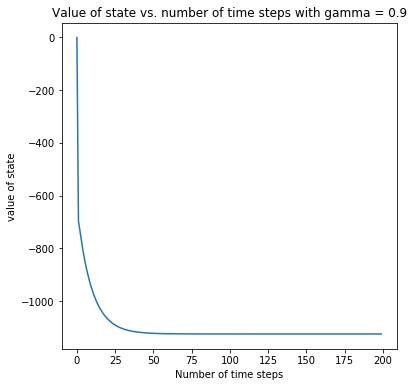

In [22]:
gamma = 0.9
def converge_state_value(T, R, s, n = 1, gamma = 0.9):
    ## return a list for the value after each number of time steps
    return [compute_state_value(T, R, s, steps, gamma) for steps in range(n)]

values = converge_state_value(T, R, initial_state, n = 200, gamma = gamma)

def plot_values(vals, gamma):
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis 
    ax.set_xlabel('Number of time steps')
    ax.set_ylabel('value of state')
    ax.set_title('Value of state vs. number of time steps with gamma = ' + str(gamma))
    plt.plot(vals)
        
plot_values(values, gamma)        

Let's see what happens for $\gamma = 0.99$. How does this change in discounting change the convergence?

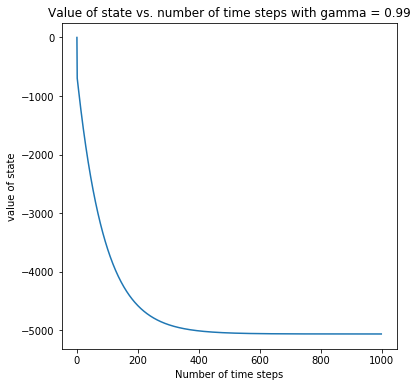

In [23]:
gamma = 0.99
values = converge_state_value(T, R, initial_state, n = 1000, gamma = gamma)
plot_values(values, gamma)  